This is in continuation with Notebook3, we are now going to try shrinking model, and see if we get the same model as by the Best model selection in N3.

- Regularizaion
- Comparision of result from best subset selection and Shrinking.

In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score

from scipy.optimize import curve_fit
import statsmodels.api as sm
import statsmodels.formula.api as smf

import re
# import glmnet as gln

%matplotlib inline
plt.style.use('seaborn-white')

['Sheet1', 'Sheet3', 'xS vs FeS domain']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
Dinv           72 non-null float64
LnFeDomains    72 non-null float64
LnDinv         72 non-null float64
X              72 non-null int64
dtypes: float64(3), int64(1)
memory usage: 2.3 KB


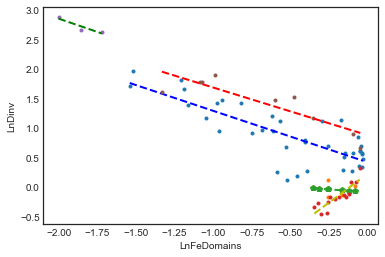

In [2]:
data2 = pd.ExcelFile('ModifiedData/Cu_sys_intro.xlsx')
print(data2.sheet_names)
df3 = data2.parse('Sheet1')
df3.head(5)

df4 = df3.drop(['Reference', 'Run #', 'D(Cu)'], axis=1)
df4.dropna()
pd.options.display.max_rows = 999
df4.info()
df4.head(5)

FNS = df4[(df4['X']==1)]
FNP = df4[(df4['X']==2)]
FNC = df4[(df4['X']==3)]
FNSi = df4[(df4['X']==4)]
FNSP = df4[(df4['X']==5)]
FSC = df4[(df4['X']==6)]

# SULPHUR
fit = np.polyfit(FNS['LnFeDomains'],FNS['LnDinv'], 1)
fit_fn = np.poly1d(fit)
plt.plot(FNS['LnFeDomains'],FNS['LnDinv'], '.', np.sort(FNS['LnFeDomains']), fit_fn(np.sort(FNS['LnFeDomains'])), '--b', linewidth=2)

# PHOSPHORUS
fit = np.polyfit(FNP['LnFeDomains'],FNP['LnDinv'], 1)
fit_fn = np.poly1d(fit)
plt.plot(FNP['LnFeDomains'],FNP['LnDinv'], '.', np.sort(FNP['LnFeDomains']), fit_fn(np.sort(FNP['LnFeDomains'])), '--p', linewidth=2)

# CARBON
fit = np.polyfit(FNC['LnFeDomains'],FNC['LnDinv'], 1)
fit_fn = np.poly1d(fit)
plt.plot(FNC['LnFeDomains'],FNC['LnDinv'], '.', np.sort(FNC['LnFeDomains']), fit_fn(np.sort(FNC['LnFeDomains'])), '--y', linewidth=2)

# S&P
fit = np.polyfit(FNSP['LnFeDomains'],FNSP['LnDinv'], 1)
fit_fn = np.poly1d(fit)
plt.plot(FNSP['LnFeDomains'],FNSP['LnDinv'], '.', np.sort(FNSP['LnFeDomains']), fit_fn(np.sort(FNSP['LnFeDomains'])), '--g', linewidth=2)

# Fe-S-C
fit = np.polyfit(FSC['LnFeDomains'],FSC['LnDinv'], 1)
fit_fn = np.poly1d(fit)
plt.plot(FSC['LnFeDomains'],FSC['LnDinv'], '.', np.sort(FSC['LnFeDomains']), fit_fn(np.sort(FSC['LnFeDomains'])), '--r', linewidth=2)


plt.xlabel("LnFeDomains")
plt.ylabel("LnDinv")
plt.show()

In [41]:
data4 = pd.ExcelFile('ModifiedData/Cu_sys_coll.xlsx')
print(data4.sheet_names)
df7 = data4.parse('Sheet1')
df7.head(5)

df8 = df7.drop(['Reference', 'Run #', 'D(Cu)','Dinv'], axis=1)
df8.dropna()
pd.options.display.max_rows = 999
df8.info()
df8.head(5)

y = df8['LnDinv']
X = df8.drop(['LnDinv'], axis=1)

['Sheet1', 'Sheet3', 'xS vs FeS domain']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
LnFeDomains    72 non-null float64
LnDinv         72 non-null float64
x1             72 non-null int64
x2             72 non-null int64
x3             72 non-null int64
x5             72 non-null int64
dtypes: float64(2), int64(4)
memory usage: 3.5 KB


In [42]:
X.head()

,LnFeDomains,x1,x2,x3,x5
0,-0.063935,1,0,0,0
1,-0.171537,1,0,0,0
2,-0.297457,1,0,0,0
3,-0.565593,1,0,0,0
4,-0.818951,1,0,0,0


We are going to use a model with all the terms(including the interaction terms), and then apply lasso regression for feature selection.

In [43]:
est1 = smf.ols('LnDinv ~ LnFeDomains + x1*LnFeDomains + x2*LnFeDomains + x3*LnFeDomains + x5*LnFeDomains ', df8).fit()
regr1 = est1.params
print(est1.summary())

print('Regression 1')
print(regr1)
print("AIC = ",est1.aic)
print("BIC = ",est1.bic)

                            OLS Regression Results                            
Dep. Variable:                 LnDinv   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     71.00
Date:                Mon, 24 Dec 2018   Prob (F-statistic):           2.95e-29
Time:                        18:57:44   Log-Likelihood:                 3.3054
No. Observations:                  72   AIC:                             13.39
Df Residuals:                      62   BIC:                             36.16
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8730      0.152      5.

Here we have taken x6 as the reference system, if we had included x6 while fitting the model we would have encountered a WARNING for sigular design matrix.

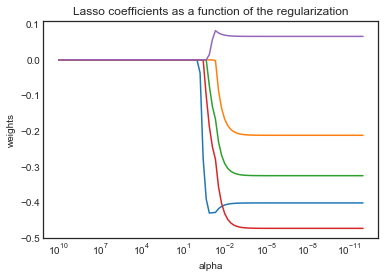

In [44]:
# alphas = 10**np.linspace(10,-2,100)*0.5
alphas = 10**np.linspace(10,-12,100)*0.5
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas*2:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X), y)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

In [45]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=10000)
lassocv.fit(scale(X), y.values.ravel())

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=10000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [46]:
lassocv.alpha_

0.003395924927462022

In [47]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X), y)
print("training_error: ",mean_squared_error(y, lasso.predict(scale(X))))

training_error:  0.0662975719394494


In [48]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

LnFeDomains   -0.403178
x1            -0.196137
x2            -0.313156
x3            -0.458269
x5             0.066987
dtype: float64

By applying Lasso regression we conclude that M2 is the best model if we are not considering the interaction terms. This is in coherence with the conclusion from adjR2-statistic. But According to AIC and BIC M3 is better

### After including **Interaction terms**:

In [49]:
df8.head()

,LnFeDomains,LnDinv,x1,x2,x3,x5
0,-0.063935,0.843970,1,0,0,0
1,-0.171537,1.139434,1,0,0,0
2,-0.297457,1.108663,1,0,0,0
3,-0.565593,1.108663,1,0,0,0
4,-0.818951,1.427116,1,0,0,0


In [50]:
df8['x1*'] = np.multiply(df8['LnFeDomains'],df8['x1'])
df8['x2*'] = np.multiply(df8['LnFeDomains'],df8['x2'])
df8['x3*'] = np.multiply(df8['LnFeDomains'],df8['x3'])
df8['x5*'] = np.multiply(df8['LnFeDomains'],df8['x5'])
df8.head()

,LnFeDomains,LnDinv,x1,x2,x3,x5,x1*,x2*,x3*,x5*
0,-0.063935,0.843970,1,0,0,0,-0.063935,-0.0,-0.0,-0.0
1,-0.171537,1.139434,1,0,0,0,-0.171537,-0.0,-0.0,-0.0
2,-0.297457,1.108663,1,0,0,0,-0.297457,-0.0,-0.0,-0.0
3,-0.565593,1.108663,1,0,0,0,-0.565593,-0.0,-0.0,-0.0
4,-0.818951,1.427116,1,0,0,0,-0.818951,-0.0,-0.0,-0.0


In [51]:
y = df8['LnDinv']
X1 = df8.drop(['LnDinv'], axis=1)

In [52]:
X1

,LnFeDomains,x1,x2,x3,x5,x1*,x2*,x3*,x5*
0,-0.063935,1,0,0,0,-0.063935,-0.000000,-0.000000,-0.000000
1,-0.171537,1,0,0,0,-0.171537,-0.000000,-0.000000,-0.000000
2,-0.297457,1,0,0,0,-0.297457,-0.000000,-0.000000,-0.000000
3,-0.565593,1,0,0,0,-0.565593,-0.000000,-0.000000,-0.000000
4,-0.818951,1,0,0,0,-0.818951,-0.000000,-0.000000,-0.000000
5,-0.977994,1,0,0,0,-0.977994,-0.000000,-0.000000,-0.000000
6,-1.540667,1,0,0,0,-1.540667,-0.000000,-0.000000,-0.000000
7,-1.522616,1,0,0,0,-1.522616,-0.000000,-0.000000,-0.000000
8,-1.208104,1,0,0,0,-1.208104,-0.000000,-0.000000,-0.000000
9,-0.943130,1,0,0,0,-0.943130,-0.000000,-0.000000,-0.000000


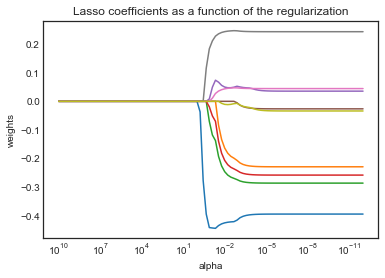

In [53]:
# alphas = 10**np.linspace(10,-2,100)*0.5
alphas = 10**np.linspace(10,-12,100)*0.5
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas*2:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X1), y)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

In [54]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=10000)
lassocv.fit(scale(X1), y.values.ravel())

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=10000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [55]:
lassocv.alpha_

0.0008411965344539042

In [56]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X1), y)
print("training_error: ",mean_squared_error(y, lasso.predict(scale(X1))))

training_error:  0.053443987763429276


In [57]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X1.columns)

LnFeDomains   -0.407976
x1            -0.214300
x2            -0.277953
x3            -0.247406
x5             0.050602
x1*           -0.012517
x2*            0.046126
x3*            0.245432
x5*           -0.012503
dtype: float64

Lets name this model Lasso model.

We are getting the same model that we got form best subset selection.<br>
Next, try adjusting values of alpha>>

The most optimum alpha chosen in lassoCV is ~ 0.1<br>
Now if reduce the alpha by 10 times, 100 times, and 1k times >> and we get the same result

In [61]:
lasso.set_params(alpha=0.01)
lasso.fit(scale(X1), y)
print("training_error: ",mean_squared_error(y, lasso.predict(scale(X1))))

# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X1.columns)

training_error:  0.05461276813778351


LnFeDomains   -0.424867
x1            -0.163496
x2            -0.245934
x3            -0.206580
x5             0.049819
x1*            0.000000
x2*            0.043628
x3*            0.243566
x5*           -0.010666
dtype: float64

In [62]:
lasso.set_params(alpha=0.001)
lasso.fit(scale(X1), y)
print("training_error: ",mean_squared_error(y, lasso.predict(scale(X1))))

# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X1.columns)

training_error:  0.0534563630659156


LnFeDomains   -0.410551
x1            -0.211577
x2            -0.276460
x3            -0.245449
x5             0.051535
x1*           -0.009942
x2*            0.046421
x3*            0.245812
x5*           -0.010411
dtype: float64

In [63]:
lasso.set_params(alpha=0.0001)
lasso.fit(scale(X1), y)
print("training_error: ",mean_squared_error(y, lasso.predict(scale(X1))))

# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X1.columns)

training_error:  0.05341407134658764


LnFeDomains   -0.395934
x1            -0.227032
x2            -0.284936
x3            -0.256562
x5             0.044346
x1*           -0.024556
x2*            0.044745
x3*            0.243648
x5*           -0.024174
dtype: float64

**Conclusion**: So lasso model or M3* are best model till date.

----------------------------------------------------

----------------------------------------------------

## Dimension Reduction
PCA

In [64]:
X1.head()

,LnFeDomains,x1,x2,x3,x5,x1*,x2*,x3*,x5*
0,-0.063935,1,0,0,0,-0.063935,-0.0,-0.0,-0.0
1,-0.171537,1,0,0,0,-0.171537,-0.0,-0.0,-0.0
2,-0.297457,1,0,0,0,-0.297457,-0.0,-0.0,-0.0
3,-0.565593,1,0,0,0,-0.565593,-0.0,-0.0,-0.0
4,-0.818951,1,0,0,0,-0.818951,-0.0,-0.0,-0.0


In [69]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
pca.fit(X1)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [70]:
print(pca.explained_variance_ratio_) 

[4.10752068e-01 3.08735430e-01 1.33738398e-01 1.01323877e-01
 3.61343583e-02 7.23653606e-03 1.27660140e-03 6.91330555e-04
 1.11400387e-04]


**Here we can see that we choose 4 or 5 components,** the variance of 4th one is 10 times lesser than the first one, and for the 5th one it is 20 times.

In [71]:
print(pca.singular_values_)

[5.67646423 4.92131611 3.23903831 2.8193171  1.68363599 0.75344819
 0.31645771 0.23287931 0.09348273]


This is in coherence with Lasso and BSS both.